## Implementing A Simplified Attention Mechanism

<div class="alert alert-block alert-success">
    
Consider the following input sentence , which has already been embedded into 3- dim vectors.
We choose a small embedding dim for illustration purpose to ensure it fits on the page without breaks:

</div>

In [1]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # your      (x^1)
     [0.55, 0.87, 0.66],  # journey   (x^2)
     [0.57, 0.85, 0.64],  # starts    (x^3)
     [0.22, 0.58, 0.34],  # with      (x^4)
     [0.77, 0.25, 0.10],  # one       (x^5)
     [0.05, 0.81, 0.55]]  # step      (x^6)
 )

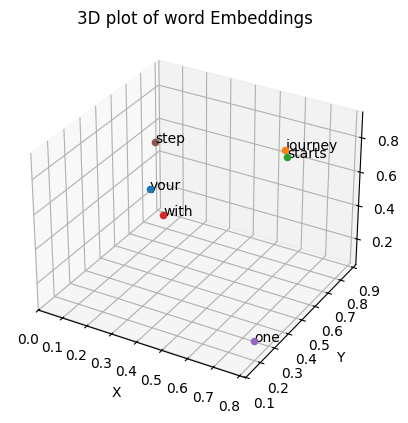

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ["your","journey","starts","with","one","step"]

x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()


# create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')


# plot each point and annotate with corresponding word
for x,y,z , word in zip(x_coords, y_coords,z_coords,words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word, fontsize=10)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word Embeddings')
plt.show()

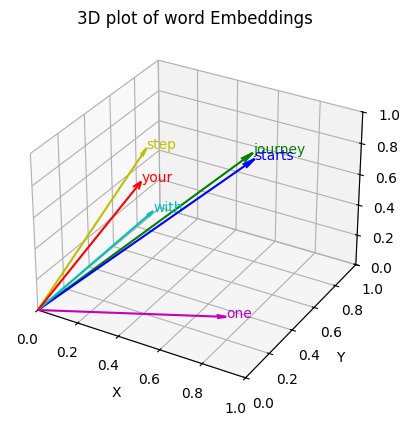

In [ ]:
# create 3D plot with vectors from origin to each point using diff colors
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

colors = ['r','g','b','c','m','y']

# plot each vector with different color and annotate with corresponding word
for (x,y,z , word ,color) in zip(x_coords, y_coords,z_coords,words,colors):
    ax.quiver(0,0,0,x,y,z,color = color, arrow_length_ratio = 0.05)
    ax.text(x,y,z,word, fontsize=10,color= color)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set plot limits to keep arrows witthin the plot boundaries
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D plot of word Embeddings')
plt.show()

In [4]:
query = inputs[1] # second input token

att_socres_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    att_socres_2[i] = torch.dot(x_i, query)


print(att_socres_2)

tensor([0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952])


In [7]:
attn_weights_2_tmp = att_socres_2 / att_socres_2.sum()


attn_weights_2_tmp, attn_weights_2_tmp.sum()

(tensor([0.1451, 0.2273, 0.2243, 0.1292, 0.1075, 0.1665]), tensor(1.))

In [8]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(att_socres_2)
attn_weights_2_naive

tensor([0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591])

In [10]:
attn_weights_2 = torch.softmax(att_socres_2, dim = 0)
attn_weights_2

tensor([0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591])

In [11]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)

print("Attention score\n", attn_scores)

Attention score
 tensor([[0.9995, 0.9544, 0.9422, 0.4842, 0.4576, 0.6325],
        [0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952],
        [0.9422, 1.4754, 1.4570, 0.8360, 0.7154, 1.0690],
        [0.4842, 0.8500, 0.8360, 0.5004, 0.3484, 0.6678],
        [0.4576, 0.7070, 0.7154, 0.3484, 0.6654, 0.2960],
        [0.6325, 1.0952, 1.0690, 0.6678, 0.2960, 0.9611]])


In [12]:
attn_scores  = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4842, 0.4576, 0.6325],
        [0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952],
        [0.9422, 1.4754, 1.4570, 0.8360, 0.7154, 1.0690],
        [0.4842, 0.8500, 0.8360, 0.5004, 0.3484, 0.6678],
        [0.4576, 0.7070, 0.7154, 0.3484, 0.6654, 0.2960],
        [0.6325, 1.0952, 1.0690, 0.6678, 0.2960, 0.9611]])

In [15]:
attn_weigths = torch.softmax(attn_scores, dim = -1)
attn_weigths

tensor([[0.2096, 0.2003, 0.1979, 0.1252, 0.1219, 0.1452],
        [0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591],
        [0.1387, 0.2364, 0.2321, 0.1247, 0.1106, 0.1575],
        [0.1438, 0.2073, 0.2044, 0.1461, 0.1255, 0.1728],
        [0.1525, 0.1957, 0.1974, 0.1368, 0.1878, 0.1298],
        [0.1375, 0.2183, 0.2127, 0.1424, 0.0982, 0.1909]])

In [17]:
all_context_vector = attn_weigths @ inputs
all_context_vector

tensor([[0.4417, 0.5946, 0.5800],
        [0.4411, 0.6532, 0.5693],
        [0.4424, 0.6513, 0.5681],
        [0.4298, 0.6318, 0.5529],
        [0.4669, 0.5924, 0.5279],
        [0.4169, 0.6532, 0.5658]])